# JPK AFM data analysis for liquid samples

## Import libraries
Run this ONLY ONCE. Always restart kernel before running.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import sys
import os
from datetime import datetime
from igor import binarywave
from PyQt5.QtWidgets import QApplication, QFileDialog, QListView, QTreeView, QAbstractItemView
#from IPython.display import Image
import matplotlib.pyplot as plt
import wetting, surfevol

app = QApplication(sys.argv)
plt.close('all')

#function to select multiple folders from dialog
def get_directories(caption=""):
    file_dialog = QFileDialog(caption=caption)
    file_dialog.setFileMode(QFileDialog.DirectoryOnly)
    file_dialog.setOption(QFileDialog.DontUseNativeDialog, True)
    file_view = file_dialog.findChild(QListView, 'listView')

    if file_view:
        file_view.setSelectionMode(QAbstractItemView.MultiSelection)
    f_tree_view = file_dialog.findChild(QTreeView)
    if f_tree_view:
        f_tree_view.setSelectionMode(QAbstractItemView.MultiSelection)

    if file_dialog.exec():
        paths = file_dialog.selectedFiles()
    else:
        paths = []

    return paths

#recognize if *.ibw file contains image data or force data
def categorize_ibw(filepath):
    ibw = binarywave.load(filepath)
    wdata = ibw["wave"]["wData"]
    meta_keys = []
    for line in str(ibw["wave"]["note"]).split("\\r"):
        if line.count(":"):
            key, val = line.split(":", 1)
            meta_keys.append(key)

    #CHECK THIS! MIGHT NOT WORK FOR SOME DATA
    if 'ForceDist' in meta_keys:
        file_cat = 'force'
    else:
        file_cat = 'image'
        
    return file_cat        

## Surface Evolver simulation data files

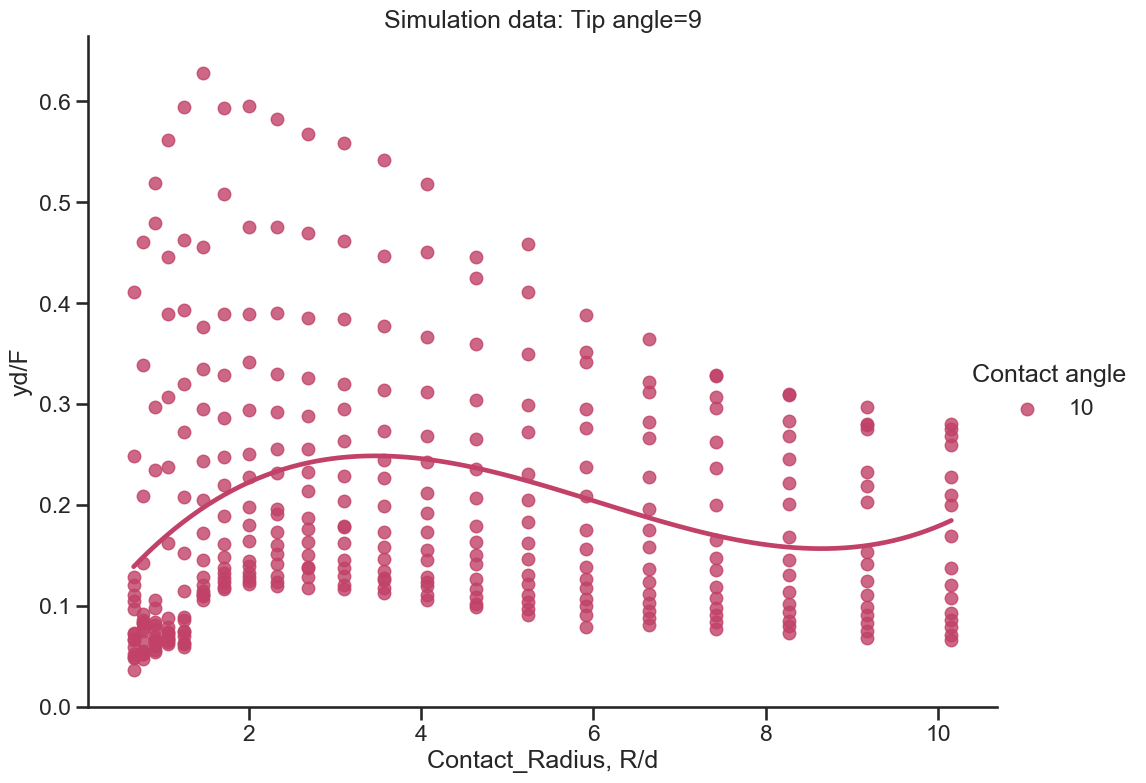

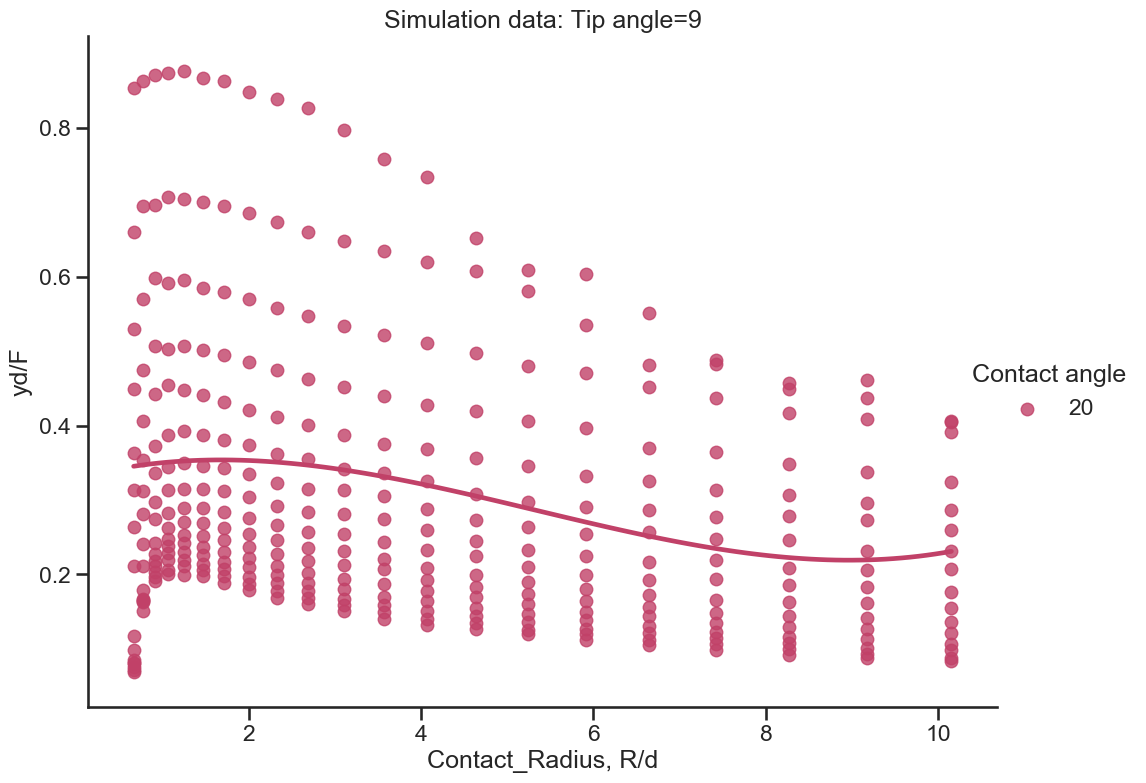

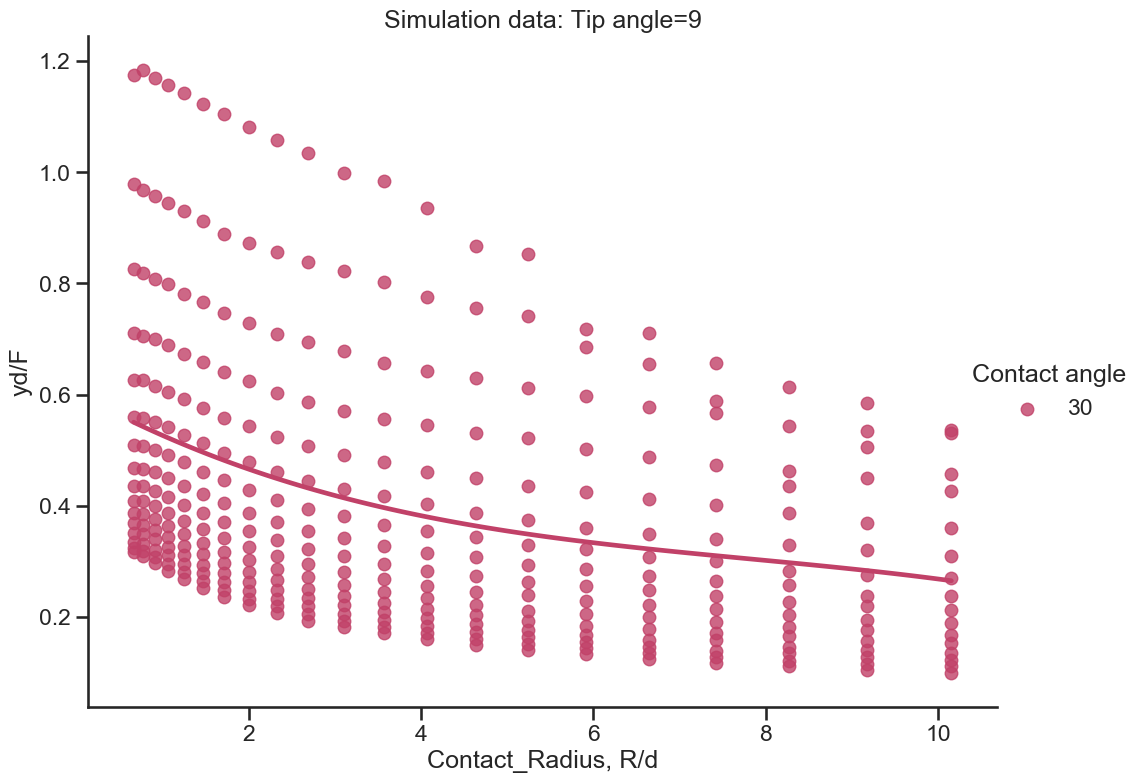

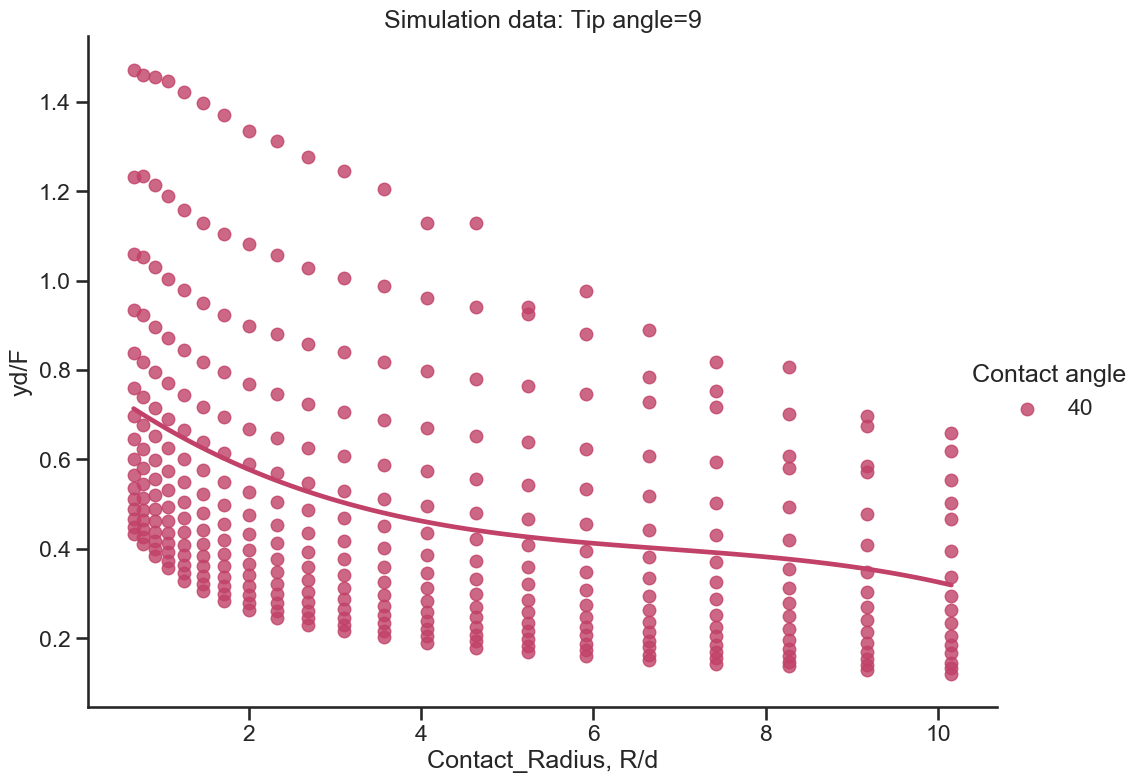

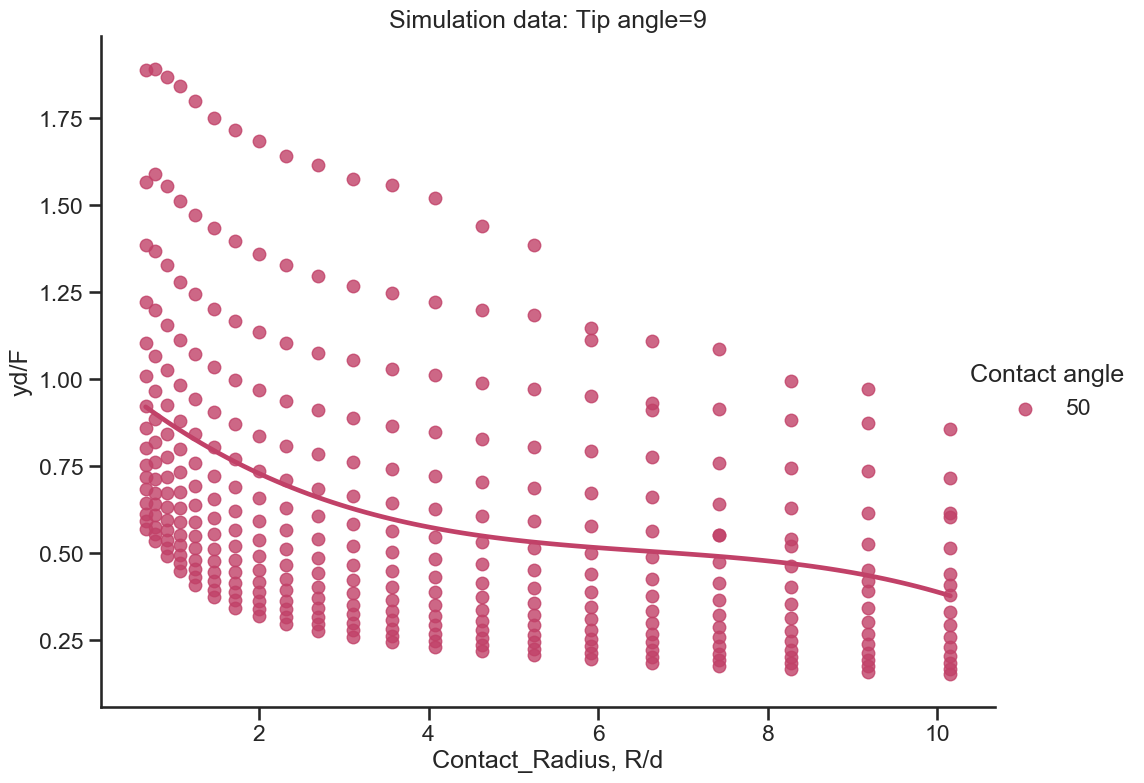

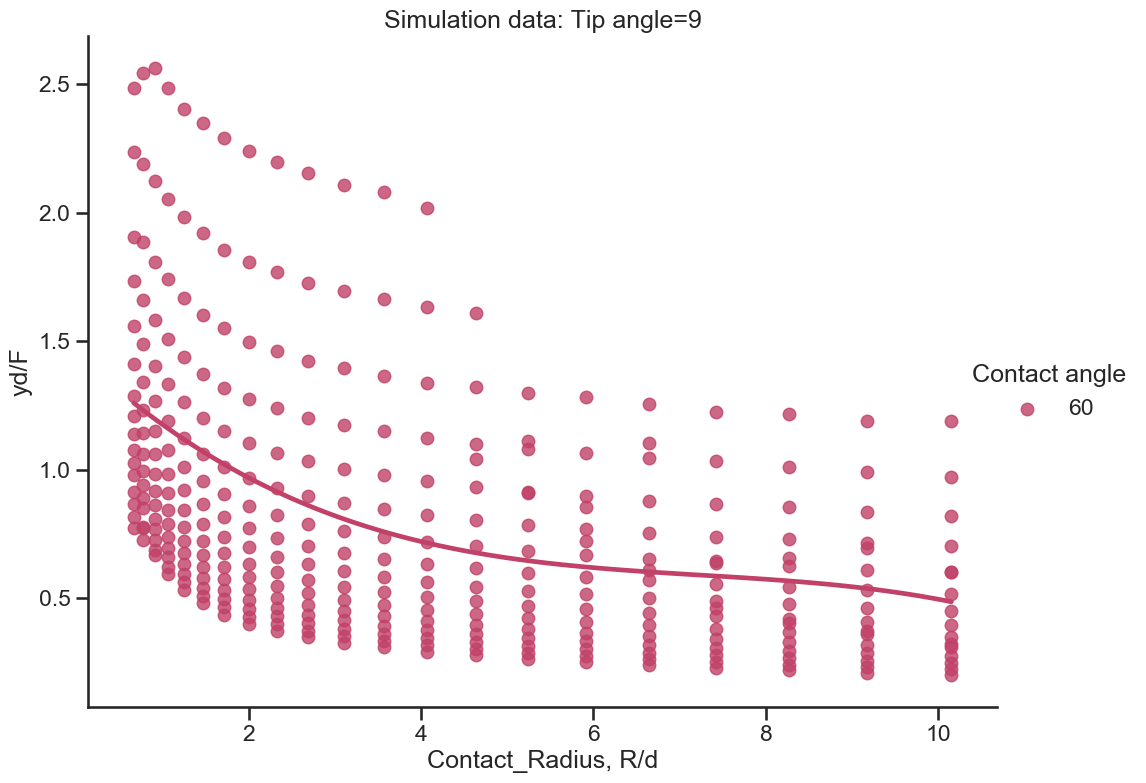

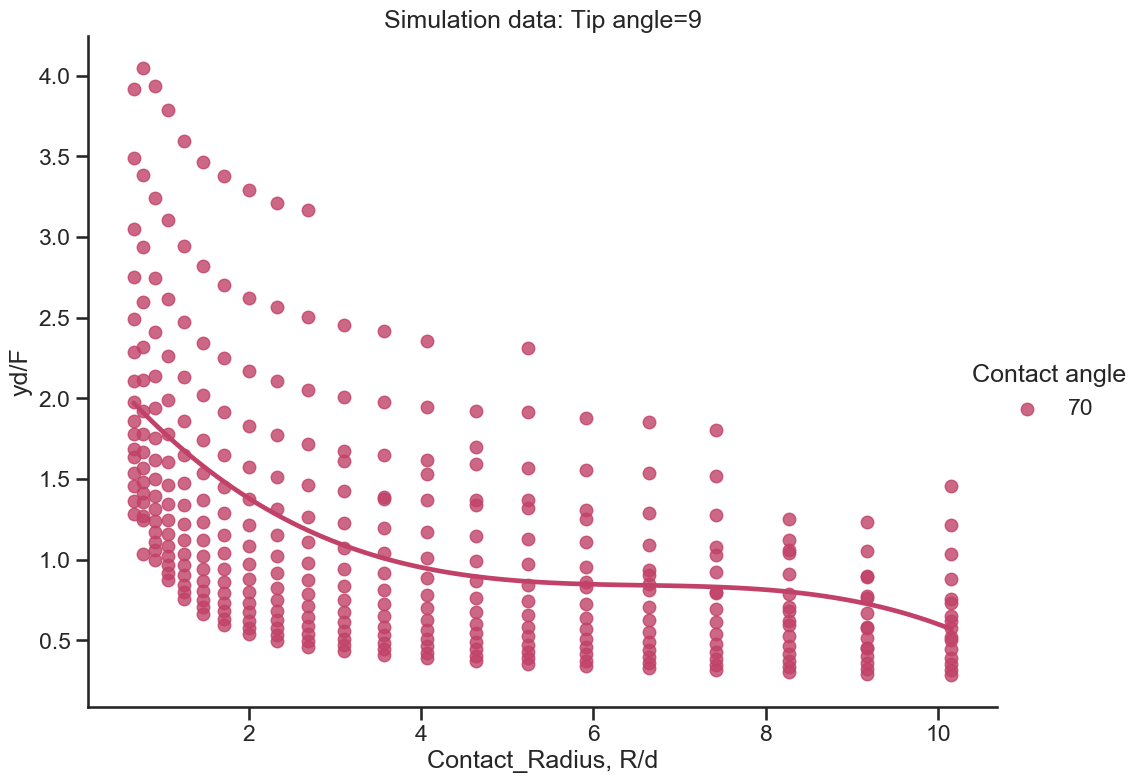

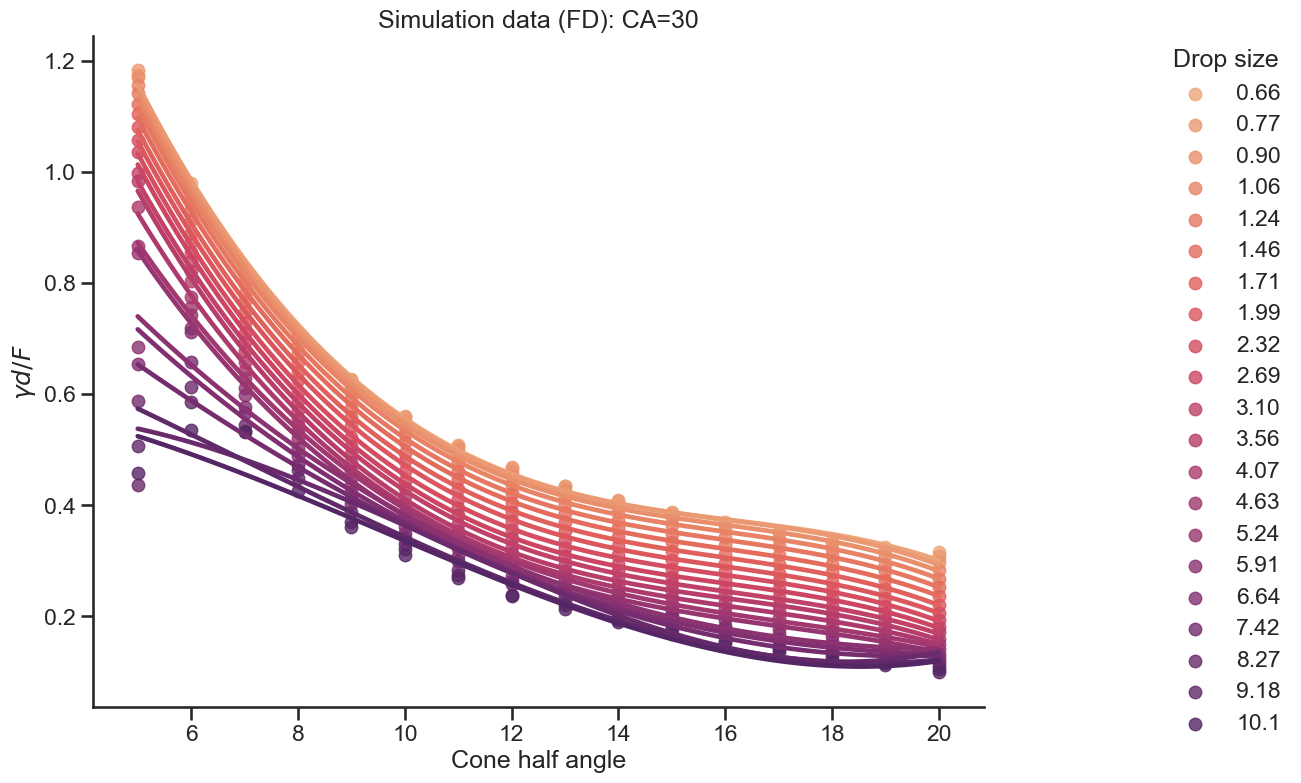

In [5]:
plt.close('all')

simu_folderpath = 'E:/Work/Surface Evolver/afm_pyramid/data/20220906_pyramid_sym_height0/' #20220906_cone_sym_height0,20220823_pyramid_sym_height0_ca30,20220822_tipangle_sym_height0,20220325_rfesp_np_fd

#combine simulation data for tip geometry
simu_df, simu_df_anal, fig_list = surfevol.combine_simul_dirs(simu_folderpath, 
                                                              fd_fit_order=3, plot=False)

#show plots below
for f in fig_list:
    display(f)
plt.close('all')

## Run Surface Tension code
Only works with classic Jupyter Notebook, not JupyterLab

In [111]:
%%javascript
Jupyter.notebook.execute_cells([8,10,12,14,16])

<IPython.core.display.Javascript object>

## JPK data raw files

In [112]:
jpk_file_paths, _ = QFileDialog.getOpenFileNames(caption='Select JPK data files') #JPK data (*.jpk,*.jpk-qi-data,*.jpk-force)
output_dir = QFileDialog.getExistingDirectory(caption='Select output data folder') #output folder
        
#separate image data and force data files
img_file_paths = []
fd_file_paths = []
for filepath in jpk_file_paths:
    file_ext = filepath.split('.')[-1]
    if file_ext in ['jpk', 'jpk-qi-data']:
        img_file_paths.append(filepath)
    elif file_ext in ['jpk-force']:
        fd_file_paths.append(filepath)
    elif file_ext in ['ibw']: #change this
        file_cat = categorize_ibw(filepath)
        if file_cat == 'image':
            img_file_paths.append(filepath)
        elif file_cat == 'force':
            fd_file_paths.append(filepath)
        
#make output directory
if output_dir == '':
        output_dir = os.path.dirname(jpk_file_paths[0]) + '/analysis' #default "analysis" folder
output_paths = []
for img_file_path in img_file_paths:
    file_name = os.path.basename(img_file_path)
    timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
    output_path = f'{output_dir}/{file_name}_results_{timestamp}'
    os.makedirs(output_path, exist_ok=True)
    output_paths.append(output_path)

print('Image data:\n', img_file_paths, '\nForce data:\n', fd_file_paths, '\nOutput folder:\n', output_paths)

Image data:
 ['E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegbrush/save_area4_drop3-2022.09.13-21.59.16.355.jpk'] 
Force data:
 ['E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegbrush/force-save_area4_drop3-2022.09.13-22.07.08.592.jpk-force'] 
Output folder:
 ['E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegbrush/analysis/save_area4_drop3-2022.09.13-21.59.16.355.jpk_results_220921-125207']


## AFM image

Image file: E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegbrush/save_area4_drop3-2022.09.13-21.59.16.355.jpk
Output folder: E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegbrush/analysis/save_area4_drop3-2022.09.13-21.59.16.355.jpk_results_220921-125207


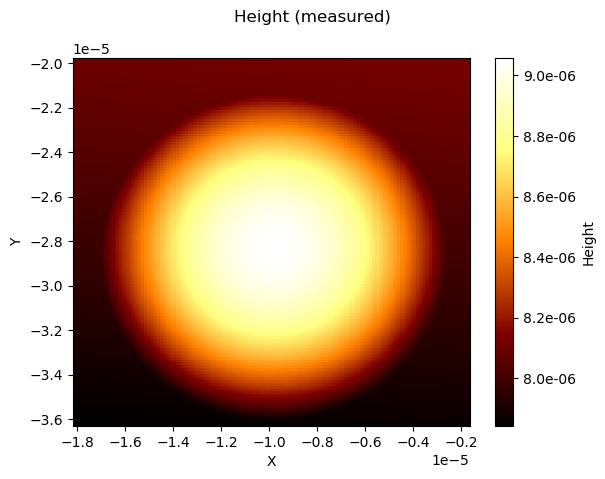

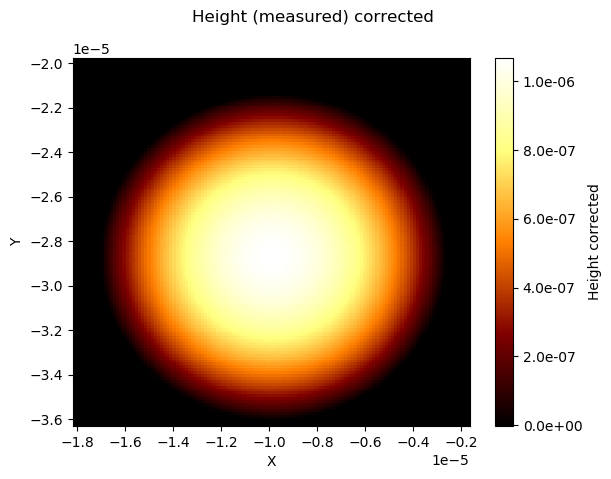

In [113]:
plt.close('all')
for img_file_path, output_path in zip(img_file_paths, output_paths):
    print('Image file:', img_file_path)
    print('Output folder:', output_path)
    afm_data, anal_data_h, fig_list =  wetting.get_afm_image(img_file_path, output_path, 
                                                             level_order=2, jump_tol=0.9)
    for fig in fig_list:
        display(fig)

plt.close('all')

## Get liquid drop properties

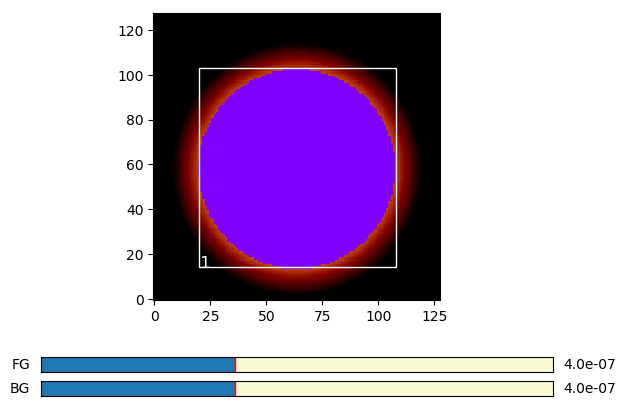

,Label,Curvature,Contact Radius,Max Height,Max Height raw,Volume,Volume raw,Drop contact angle,s,R/d,AFM file
0,1,0.000025,0.000007,0.000001,0.000001,8.943977e-17,7.640154e-17,16.627565,0.000003,6.843227,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...


In [114]:
plt.close('all')
#drop analysis of AFM data
drop_df, img_anal, fig_list = wetting.get_drop_prop(afm_data, anal_data_h, output_paths[0])
drop_df['AFM file'] = img_file_paths[0]
for fig in fig_list:
    display(fig)
display(drop_df)
plt.close('all')

## Analyze force distance curves

Force file: E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegbrush/force-save_area4_drop3-2022.09.13-22.07.08.592.jpk-force
jumpin distance 1.0781370533252187e-06
Fit distance 5.358773533961604e-07
FD wetted length: 1.2062173456552432e-06
energy 1 9.077074070288833e-14


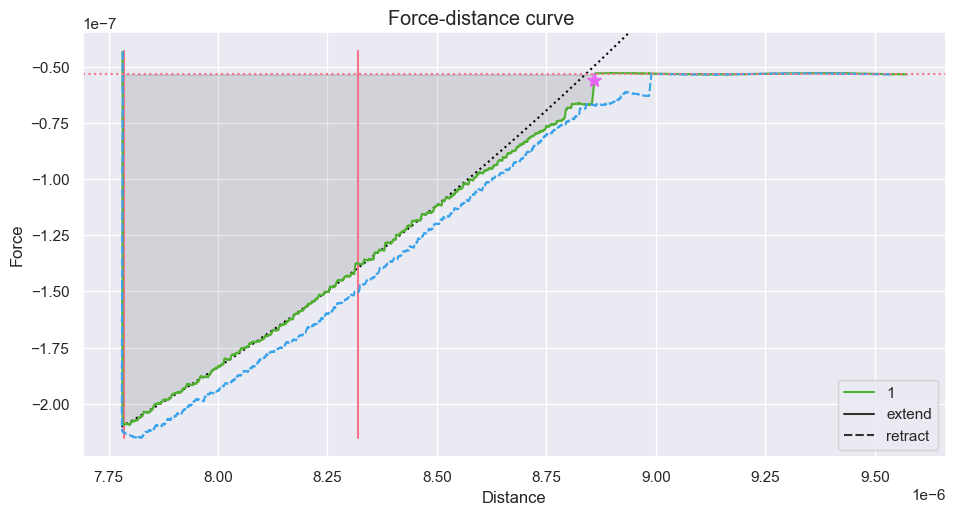

,Label,Adhesion (FD),Jumpin distance (FD),Slope (FD),Wetted length (FD),Fit distance (FD),Adhesion energy (FD),FD X position,FD Y position,FD file
0,1,1.560458e-07,0.000001,0.131182,0.000001,5.358774e-07,9.077074e-14,-0.00001,-0.000029,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...


In [115]:
plt.close('all')
fd_drop_df, fdfit_dict, fddata_dict, fig_list = wetting.analyze_drop_fd(fd_file_paths, afm_data, img_anal,
                                                                        force_cycle = 'approach', fit_order = 2,
                                                                        output_path = output_paths[0])

for fig in fig_list:
    #fig = Image(fig_path, width=400, height=400)
    display(fig)
display(fd_drop_df)

## Droplet surface tension calculation

In [116]:
#based on fixed AFM tip angle and contact angle 
plt.close('all')
plt.style.use('seaborn-bright')
contact_angle = 30 #Set fixed value to calculate its corresponsing surface tension
tip_angle = 15
#combine droplet image and force result data
afm_df = drop_df.set_index('Label').join(fd_drop_df.set_index('Label'), how='right')

#calculate surface tension (from rupture distance)
output_df = wetting.get_surface_tension(afm_df, simu_df,contact_angle,tip_angle,
                                          fd_file_paths, output_paths[0], True)

Label
1    45.243743
Name: Surface Tension FD (mN), dtype: float64
    level_0  index  Contact_Radius  Height  Force_Eng  Force_Calc  \
0       105      0        0.661050     0.0  -0.217288   -0.330959   
1       106      1        0.775658     0.0  -0.230682   -0.328734   
2       107      2        0.909262     0.0  -0.246053   -0.325871   
3       108      3        1.065688     0.0  -0.263059   -0.321507   
4       109      4        1.248905     0.0  -0.281281   -0.315594   
5       110      5        1.462786     0.0  -0.300200   -0.307684   
6       111      6        1.710910     0.0  -0.319545   -0.298251   
7       112      7        1.996452     0.0  -0.338881   -0.287844   
8       113      8        2.322187     0.0  -0.358088   -0.277625   
9       114      9        2.690561     0.0  -0.377704   -0.266167   
10      115     10        3.103803     0.0  -0.396714   -0.255325   
11      116     11        3.564011     0.0  -0.415978   -0.245664   
12      117     12        4.073223  

In [143]:
plt.close('all')
plt.style.use('seaborn-bright')
contact_angle = 50 #Set fixed value to calculate its corresponsing surface tension

#combine droplet image and force result data
afm_df = drop_df.set_index('Label').join(fd_drop_df.set_index('Label'), how='right')

#calculate surface tension (from rupture distance)
output_df = wetting.get_surface_tension3(afm_df, simu_df_anal,contact_angle,
                                          fd_file_paths, output_paths[0], True)

#output_df_filtered = output_df.dropna(subset=['FD file'])


# calculate surface tension from slopes of linear FD fitting
output_df2 = wetting.get_surface_tension2(afm_df, simu_df,
                                         tolerance=0.5,
                                         fd_file_paths=fd_file_paths,
                                         file_path=output_paths[0], save=True)
#output_df_filtered2 = output_df2[output_df['FD file'] != '']

# calculate surface tension by complete FD fitting using 2nd order poly approximation
output_df3, fig = wetting.get_surface_tension4(afm_df, simu_df, fdfit_dict,fddata_dict,
                                              file_path=output_paths[0], save=True)

ax = output_df.plot(x='Contact Radius', y=['Surface Tension (rupture, mN)','Surface Tension (fixed, mN)'],
                             marker = "o", ls="")
ax.plot(output_df2['Contact Radius'],output_df2['Surface Tension FD (mN)'],
        label="Surface Tension (slope, mN)", marker = "o", ls="")
ax.plot(output_df3['Contact Radius'],output_df3['Surface Tension (error min, mN)'],
        label="Surface Tension (polyfit, mN)", marker = "o", ls="")
ax.legend()

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig1 = ax.get_figure()
display(fig1)
fig1.savefig(f'{output_paths[0]}/surface_tension.png', bbox_inches = 'tight',
             transparent = False)

plot_vars = ['Drop contact angle','Tip contact angle (rupture)',
             'Adhesion (FD)', 'Wetted length (FD)']
ax = output_df.plot(x='Contact Radius', y=plot_vars,title = plot_vars,
                             marker = "o", ls="", subplots=True, layout=(2,2), figsize=(11,10),
                             legend=False)
#number formatting
ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig2 = ax[0][0].get_figure()
display(fig2)
fig2.savefig(f'{output_paths[0]}/other_results.png', bbox_inches = 'tight',
             transparent = False)

display(output_df)
display(output_df2)
display(output_df3)
display(fig)
fig.savefig(f'{output_paths[0]}/polyfit_result.png', bbox_inches = 'tight',
            transparent = False)
plt.close('all')

KeyError: 'Contact_Radius'

## Combine results from different folders

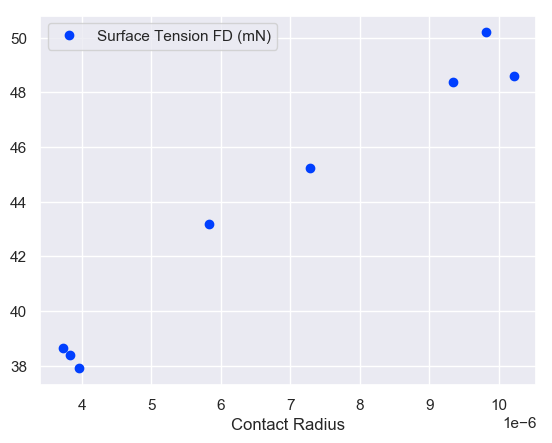

,Label,Curvature,Contact Radius,Max Height,Max Height raw,Volume,Volume raw,Drop contact angle,s,R/d,...,FD X position,FD Y position,FD file,Tip angle,F_fit,yd/F,Surface Tension FD (mN),Simulation contact angle,Folder name,File path
0,1,0.000040,0.000010,1.230010e-06,1.234227e-06,1.871705e-16,1.617062e-16,14.283438,0.000004,7.981096,...,-0.000006,-0.000014,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...,15,-0.539376,0.295072,50.194392,30,save_area1-2022.09.13-20.39.48.335.jpk_results...,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...
0,1,0.000034,0.000009,1.321134e-06,1.322508e-06,1.823569e-16,1.567806e-16,16.096979,0.000004,7.071938,...,-0.000019,-0.000022,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...,15,-0.520299,0.305891,48.379906,30,save_area2_drop1-2022.09.13-20.57.41.213.jpk_r...,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...
0,1,0.000014,0.000004,5.539334e-07,5.550239e-07,1.284759e-17,1.115580e-17,16.462481,0.000001,6.912818,...,-0.000001,0.000004,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...,15,-0.516979,0.307856,38.378751,30,save_area2_drop2-2022.09.13-21.12.15.882.jpk_r...,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...
1,2,0.000013,0.000004,5.553621e-07,5.564365e-07,1.221952e-17,1.062087e-17,16.942163,0.000001,6.714336,...,0.000017,0.000012,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...,15,-0.512795,0.310368,38.654086,30,save_area2_drop2-2022.09.13-21.12.15.882.jpk_r...,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...
0,2,0.000014,0.000004,5.931178e-07,5.935482e-07,1.470744e-17,1.159272e-17,17.043374,0.000002,6.673875,...,0.000011,-0.000017,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...,15,-0.511934,0.310890,37.903901,30,save_area4-2022.09.13-21.48.20.947.jpk_results...,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...
1,3,0.000020,0.000006,8.697121e-07,8.695323e-07,4.668934e-17,4.208921e-17,16.985481,0.000002,6.696960,...,-0.000006,-0.000004,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...,15,-0.512426,0.310591,43.185501,30,save_area4-2022.09.13-21.48.20.947.jpk_results...,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...
0,1,0.000035,0.000010,1.542721e-06,1.547108e-06,2.548785e-16,2.190562e-16,17.173261,0.000004,6.622643,...,0.000008,-0.000025,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...,15,-0.510839,0.311556,48.603192,30,save_area3-2022.09.13-21.35.26.604.jpk_results...,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...
0,1,0.000025,0.000007,1.064804e-06,1.068341e-06,8.943977e-17,7.640154e-17,16.627565,0.000003,6.843227,...,-0.000010,-0.000029,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...,15,-0.515518,0.308728,45.243743,30,save_area4_drop3-2022.09.13-21.59.16.355.jpk_r...,E:/Work/AFM/20220913 glycerol_mica_RFESPA_pegb...


In [117]:
plt.cla()
plt.clf()
plt.close('all')
folder_paths = get_directories("Select analysis result folder (containing output Excel file)")
summary_df = wetting.combine_result_spreadsheets(folder_paths)
summary_df = summary_df[summary_df['FD file'] != '']

surf_ten_label = [#'Surface Tension (rupture, mN)', 
                  #'Surface Tension (fixed, mN)',
                  'Surface Tension FD (mN)', 
                  #'Surface Tension (error min, mN)'
                ]
#summary_df = summary_df[summary_df[surf_ten_label] != 0]
#summary_df.replace(0, np.nan, inplace=True)
timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
summary_df.to_excel(f'{output_dir}/summary_data_all_{timestamp}.xlsx', index=None)

ax = summary_df.plot(x='Contact Radius', 
                     y=surf_ten_label,
                     marker = "o", ls="")

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig3 = ax.get_figure()
fig3.savefig(f'{output_dir}/summary_plot_all_{timestamp}.png', bbox_inches = 'tight',
             transparent = False)
display(fig3)
display(summary_df)
plt.close('all')

## Combine multiple FD curves

In [84]:
plt.close('all')
# combine multiple fd curves
output_path = ''
fd_file_paths, _ = QFileDialog.getOpenFileNames()
wetting.combine_fd(fd_file_paths, zero_shift=True, 
                   output_dir=output_path,save=False)
#wetting.get_adhesion_from_fd(fd_file_paths)

Raw
Defl
ZSnsr


## Optional codes

In [ ]:
# calculate contact angle from fd curve
label = 5 #INPUT
label_df = drop_df[drop_df['Label']==label]
s = label_df['s'].iloc[0]
R = round(label_df['R/s'].iloc[0])
contact_angle = wetting.get_contact_angle(fd_file_paths[0], simu_df,
                                         R, s, fit_index=5000)

